### Data Preprosessing and Visualization
- This .ipynb runs with python==3.10, 
- requiremnets.txt is available

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# reading data
data = pd.read_csv("amz_uk_data.csv")

In [58]:
# before any preprosessing process is done, data needs to be checked first. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB


In [59]:
# checking if null exists
data.isnull().sum()

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

In [60]:
# drop missing values. Assumed that missing values are not important.
data.dropna(inplace=True)

In [61]:
# try categorical "bout in last month" to check before reassign
# making this categorical help visualization process
pd.Categorical(data['boughtInLastMonth'])

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 2222742
Categories (25, int64): [0, 50, 100, 200, ..., 20000, 30000, 40000, 50000]

In [62]:
category_sales = data.groupby('categoryName')['boughtInLastMonth'].sum().reset_index()

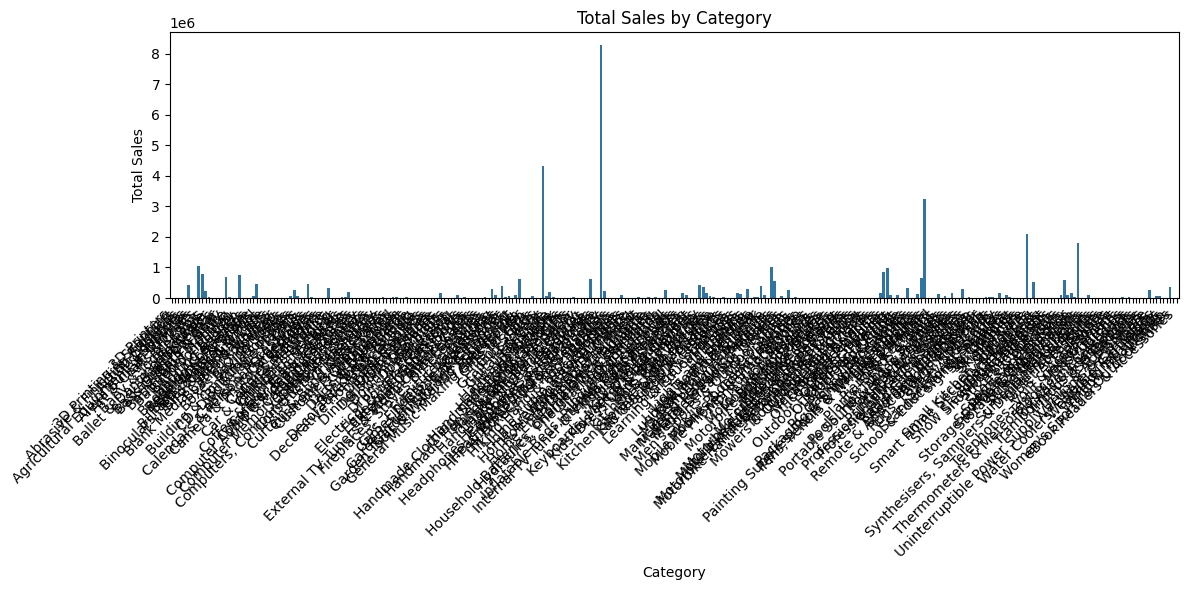

In [63]:
# plot total sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x='categoryName', y='boughtInLastMonth', data=category_sales)
plt.xticks(rotation=45, ha='right')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### since the "Total sales by Category" becomes messy with large data, it needs to be better expressed with pie chart with top 5.

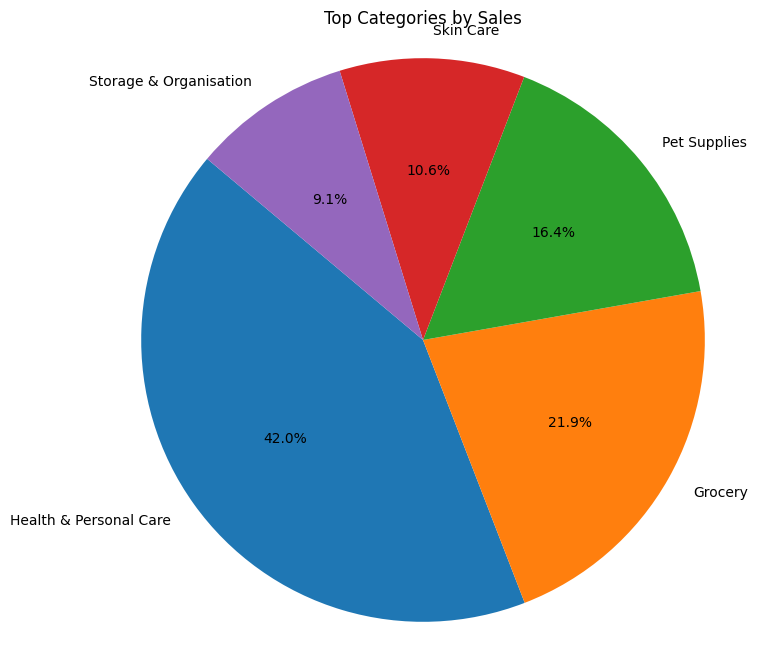

In [64]:
category_sales_sorted = category_sales.sort_values(by='boughtInLastMonth', ascending=False)

# this code selects the top 5 categories. 
# adjust this code of 5 to make it 10 to show more data.
top_categories = category_sales_sorted.head(5)   

# plot pie chart for top categories
plt.figure(figsize=(8, 8))
plt.pie(top_categories['boughtInLastMonth'], labels=top_categories['categoryName'], autopct='%1.1f%%', startangle=140)
plt.title('Top Categories by Sales')
plt.axis('equal') 
plt.show()

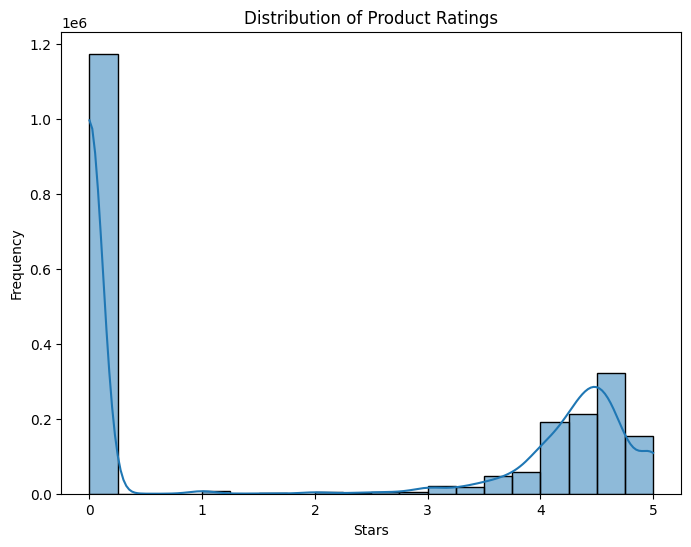

In [65]:
# make visualization distribution of product ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['stars'], bins=20, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

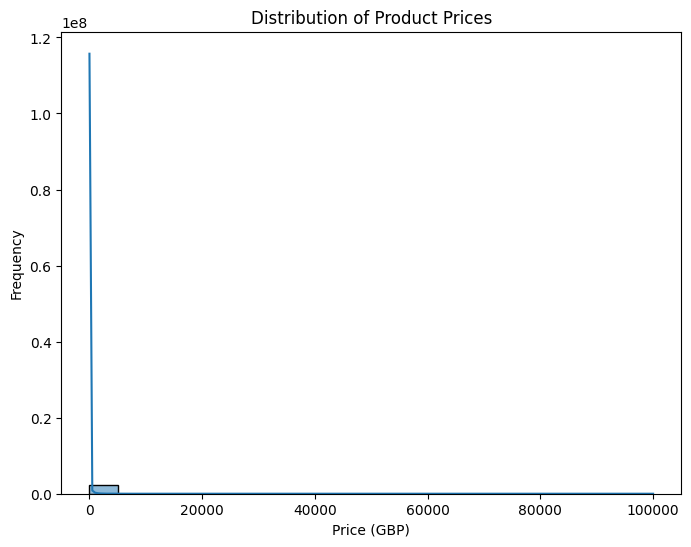

In [66]:
# visualize distribution of prices
# note, most the of prices tend to be skewed at the left. 
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (GBP)')
plt.ylabel('Frequency')
plt.show()